In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, metrics
from sklearn.model_selection import GridSearchCV

In [2]:
simu_df=pd.read_csv("../donnees/simu.txt", sep=' ')

__<span style="font-size: 18pt;">Visualisation</span>__

In [161]:
print(simu_df)

            X1        X2  Y
0    -1.681427 -1.534811  1
1    -0.690532  0.710814  1
2     4.676125 -1.624768  2
3     0.211525  3.657683  2
4     0.387863  0.522408  2
...        ...       ... ..
1995  0.229931 -4.285424  2
1996  0.765494  3.802492  1
1997  0.832340  3.643517  2
1998  1.610568 -2.024568  1
1999 -1.381457  3.363066  2

[2000 rows x 3 columns]


In [162]:
simu_df.describe()

,X1,X2,Y
count,2000.000000,2000.000000,2000.000000
mean,0.087890,-0.043909,1.414000
std,3.001684,2.955444,0.492672
min,-9.143583,-9.387265,1.000000
25%,-1.931862,-1.944058,1.000000
50%,0.086439,-0.074521,1.000000
75%,2.125775,1.945073,2.000000
max,10.171112,10.263284,2.000000


In [163]:
simu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   Y       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


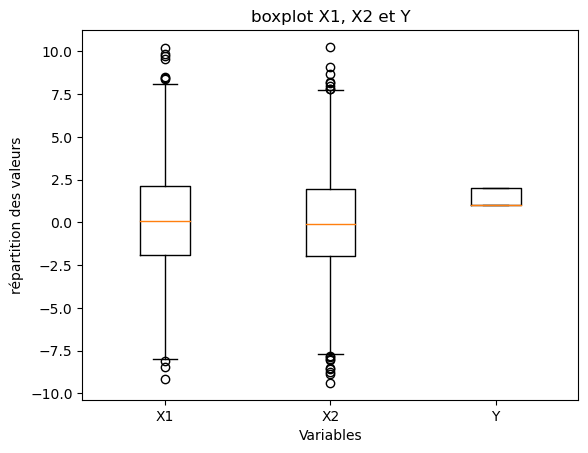

In [164]:
plt.boxplot(simu_df.values, labels= simu_df.columns )
plt.title("boxplot X1, X2 et Y")
plt.xlabel("Variables")
plt.ylabel("répartition des valeurs")
plt.show()

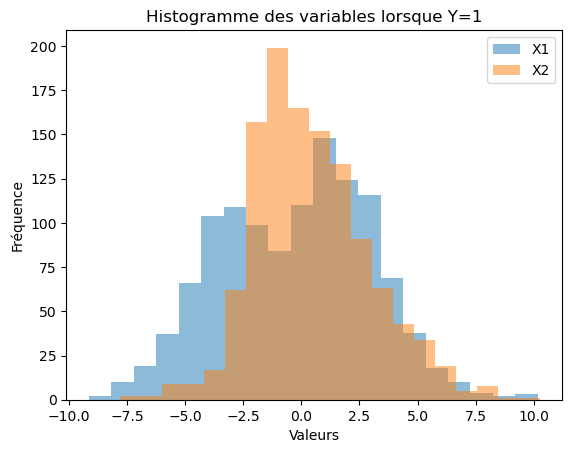

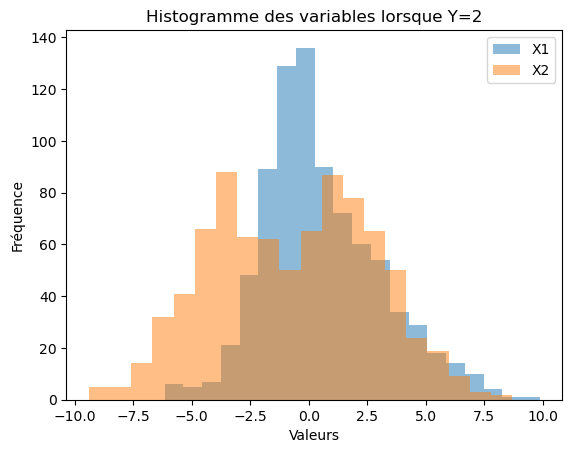

In [165]:
X= simu_df[["X1" , "X2"]]

subset1 = X[simu_df["Y"] == 1]

for column in subset1.columns:
    plt.hist(subset1[column], bins=20, alpha=0.5, label=column)

plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des variables lorsque Y=1')
plt.legend(loc='upper right')
plt.show()


subset2 = X[simu_df["Y"] == 2]

for column in subset2.columns:
    plt.hist(subset2[column], bins=20, alpha=0.5, label=column)

plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des variables lorsque Y=2')
plt.legend(loc='upper right')
plt.show()

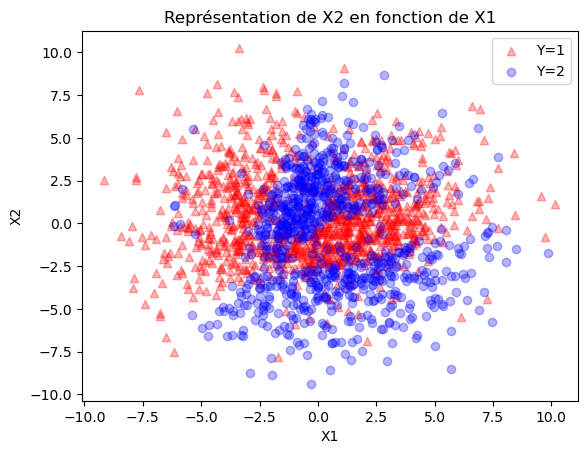

In [166]:
X1=simu_df["X1"]
X2=simu_df["X2"]
Y=simu_df["Y"]

plt.scatter(X1[Y == 1], X2[Y == 1], marker='^', label='Y=1', color='red', alpha=0.3)
plt.scatter(X1[Y == 2], X2[Y == 2], marker='o', label='Y=2', color='blue', alpha=0.3)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Représentation de X2 en fonction de X1')
plt.legend()
plt.show()

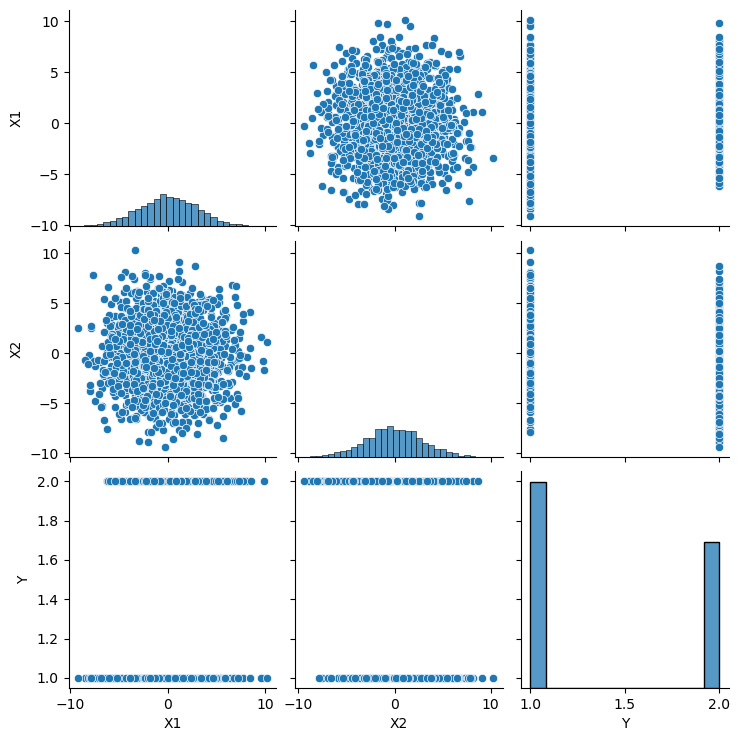

In [167]:
sns.pairplot(simu_df)
plt.show()

__<span style="font-size: 18pt;">Création d'une base de données sans outliers </span>__

In [168]:
def val_aber_in_col(donnees):
    Q1=np.percentile(donnees,25)
    Q3=np.percentile(donnees,75)
    IQR= Q3 - Q1
    
    seuil_inf=Q1 -1.5*IQR
    seuil_sup=Q3 +1.5*IQR
    
    val_aber = (donnees < seuil_inf) | (donnees > seuil_sup)
    
    val_aber = donnees[val_aber]

    return val_aber
    
val_aber_X1=val_aber_in_col(simu_df["X1"])
val_aber_X2=val_aber_in_col(simu_df["X2"])
print(val_aber_X1, "\n", val_aber_X2)

163      9.723120
590     -8.429324
1010     8.392173
1011     8.496678
1125     9.552133
1323    10.171112
1434    -8.085988
1621     9.871552
1702    -9.143583
1949     8.448253
Name: X1, dtype: float64 
 366      9.066313
382     -8.545640
431      8.205628
617     -7.897523
829      8.126878
981     10.263284
1004     7.795471
1065    -8.753929
1179     7.961222
1244    -8.849615
1322    -8.518129
1428    -9.387265
1432    -7.979008
1607    -8.034493
1645    -7.828575
1968     7.798475
1975     8.684563
Name: X2, dtype: float64


In [169]:
liste_ligne_a_sup1 = val_aber_X1.index.tolist()
liste_ligne_a_sup2 = val_aber_X2.index.tolist()
liste_lignes_a_sup= liste_ligne_a_sup1 + liste_ligne_a_sup2
print (liste_lignes_a_sup)

[163, 590, 1010, 1011, 1125, 1323, 1434, 1621, 1702, 1949, 366, 382, 431, 617, 829, 981, 1004, 1065, 1179, 1244, 1322, 1428, 1432, 1607, 1645, 1968, 1975]


In [170]:
new_simu_df= simu_df.drop(liste_lignes_a_sup)
print (new_simu_df)

            X1        X2  Y
0    -1.681427 -1.534811  1
1    -0.690532  0.710814  1
2     4.676125 -1.624768  2
3     0.211525  3.657683  2
4     0.387863  0.522408  2
...        ...       ... ..
1995  0.229931 -4.285424  2
1996  0.765494  3.802492  1
1997  0.832340  3.643517  2
1998  1.610568 -2.024568  1
1999 -1.381457  3.363066  2

[1973 rows x 3 columns]


In [171]:
new_simu_df.info

<bound method DataFrame.info of             X1        X2  Y
0    -1.681427 -1.534811  1
1    -0.690532  0.710814  1
2     4.676125 -1.624768  2
3     0.211525  3.657683  2
4     0.387863  0.522408  2
...        ...       ... ..
1995  0.229931 -4.285424  2
1996  0.765494  3.802492  1
1997  0.832340  3.643517  2
1998  1.610568 -2.024568  1
1999 -1.381457  3.363066  2

[1973 rows x 3 columns]>

__<span style="font-size: 18pt;">TrainTestSplit</span>__

In [4]:
X = simu_df.drop('Y', axis = 1)
y = simu_df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Sans les potentiels outliers

In [174]:
X_new = new_simu_df.drop('Y', axis = 1)
y_new = new_simu_df['Y']

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

__<span style="font-size: 18pt;">Analyse discriminante linéaire</span>__

Les variables suivent des lois normales et ont une variance similaire donc on peut faire une analyse discriminante linéaire

In [7]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.678
Matrice de confusion :
[[268  47]
 [114  71]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.70      0.85      0.77       315
           2       0.60      0.38      0.47       185

    accuracy                           0.68       500
   macro avg       0.65      0.62      0.62       500
weighted avg       0.66      0.68      0.66       500



__<span style="font-size: 18pt;">Regression logistique</span>__

__Avec les données originelles__

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.678
Matrice de confusion :
[[268  47]
 [114  71]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.70      0.85      0.77       315
           2       0.60      0.38      0.47       185

    accuracy                           0.68       500
   macro avg       0.65      0.62      0.62       500
weighted avg       0.66      0.68      0.66       500



__Sans les outliers__

In [175]:
model = LogisticRegression()
model.fit(X_new_train, y_new_train)
y_new_pred = model.predict(X_new_test)

new_accuracy= accuracy_score(y_new_test, y_new_pred)
new_conf_matrix = confusion_matrix (y_new_test, y_new_pred)
new_classification_rep = classification_report (y_new_test, y_new_pred)

print(f"Précision du modèle : {new_accuracy}")
print(f"Matrice de confusion :\n{new_conf_matrix}")
print(f"Rapport de classification :\n{new_classification_rep}")

Précision du modèle : 0.6781376518218624
Matrice de confusion :
[[260  48]
 [111  75]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.70      0.84      0.77       308
           2       0.61      0.40      0.49       186

    accuracy                           0.68       494
   macro avg       0.66      0.62      0.63       494
weighted avg       0.67      0.68      0.66       494



_même précision avec ou sans les outliers_

__Sur-apprentissage (modèle avec les outliers) ?__

In [176]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy= accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix (y_train, y_pred)
classification_rep = classification_report (y_train, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.652
Matrice de confusion :
[[725 132]
 [390 253]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.65      0.85      0.74       857
           2       0.66      0.39      0.49       643

    accuracy                           0.65      1500
   macro avg       0.65      0.62      0.61      1500
weighted avg       0.65      0.65      0.63      1500



_pas d'overfitting_

__<span style="font-size: 18pt;">Arbre de classification</span>__


__Avec les données originelles__

In [177]:
model = DecisionTreeClassifier(random_state=42, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.76
Matrice de confusion :
[[253  62]
 [ 58 127]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.81      0.80      0.81       315
           2       0.67      0.69      0.68       185

    accuracy                           0.76       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.76      0.76      0.76       500



__Sans les outliers__

In [178]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_new_train, y_new_train)
y_new_pred = model.predict(X_new_test)

new_accuracy= accuracy_score(y_new_test, y_new_pred)
new_conf_matrix = confusion_matrix (y_new_test, y_new_pred)
new_classification_rep = classification_report (y_new_test, y_new_pred)

print(f"Précision du modèle : {new_accuracy}")
print(f"Matrice de confusion :\n{new_conf_matrix}")
print(f"Rapport de classification :\n{new_classification_rep}")

Précision du modèle : 0.7368421052631579
Matrice de confusion :
[[236  72]
 [ 58 128]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.80      0.77      0.78       308
           2       0.64      0.69      0.66       186

    accuracy                           0.74       494
   macro avg       0.72      0.73      0.72       494
weighted avg       0.74      0.74      0.74       494



_moins précis_

__Sur-apprentissage (du modèle avec les outliers) ?__


In [179]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy= accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix (y_train, y_pred)
classification_rep = classification_report (y_train, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 1.0
Matrice de confusion :
[[857   0]
 [  0 643]]
Rapport de classification :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       857
           2       1.00      1.00      1.00       643

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



*over-fitting*

__Post pruning__

In [180]:
clf = DecisionTreeClassifier()

path=clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("ccp alpha values :", ccp_alphas)
print("Impurities :", impurities) 

ccp alpha values : [0.         0.00044444 0.00044444 0.00044444 0.00044444 0.00047619
 0.0005     0.0005     0.0005     0.0005     0.0005     0.00053333
 0.00053333 0.00053333 0.00053333 0.00053333 0.00055556 0.00055556
 0.00055556 0.00055556 0.00055556 0.0005641  0.00057143 0.00057143
 0.00058667 0.00059259 0.00059259 0.00059259 0.00059524 0.00059933
 0.0006     0.0006     0.0006     0.0006     0.00060317 0.00060606
 0.00061093 0.00061192 0.00061538 0.00061905 0.00062016 0.00062324
 0.000625   0.000625   0.00062851 0.00062934 0.00063158 0.00063768
 0.00064    0.00064141 0.00064242 0.00064314 0.00064646 0.00064646
 0.00064646 0.00065716 0.00065816 0.00066667 0.00066667 0.00066667
 0.00066667 0.00066667 0.00067488 0.00068889 0.00069136 0.00071111
 0.00071294 0.00072727 0.00073074 0.00074074 0.00074074 0.00074129
 0.00074561 0.00078877 0.0007907  0.00079365 0.0008     0.0008
 0.0008     0.0008     0.0008     0.00084848 0.00085087 0.0008547
 0.00085548 0.00085658 0.00085714 0.00085785 0.0

In [181]:
clfs=[] 
for ccp_alpha in ccp_alphas: 
    clf=DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(clfs)

[DecisionTreeClassifier(), DecisionTreeClassifier(ccp_alpha=0.0004444444444444444), DecisionTreeClassifier(ccp_alpha=0.0004444444444444444), DecisionTreeClassifier(ccp_alpha=0.0004444444444444444), DecisionTreeClassifier(ccp_alpha=0.0004444444444444444), DecisionTreeClassifier(ccp_alpha=0.0004761904761904762), DecisionTreeClassifier(ccp_alpha=0.0005), DecisionTreeClassifier(ccp_alpha=0.0005), DecisionTreeClassifier(ccp_alpha=0.0005), DecisionTreeClassifier(ccp_alpha=0.0005), DecisionTreeClassifier(ccp_alpha=0.0005), DecisionTreeClassifier(ccp_alpha=0.0005333333333333333), DecisionTreeClassifier(ccp_alpha=0.0005333333333333333), DecisionTreeClassifier(ccp_alpha=0.0005333333333333333), DecisionTreeClassifier(ccp_alpha=0.0005333333333333333), DecisionTreeClassifier(ccp_alpha=0.0005333333333333334), DecisionTreeClassifier(ccp_alpha=0.0005555555555555556), DecisionTreeClassifier(ccp_alpha=0.0005555555555555556), DecisionTreeClassifier(ccp_alpha=0.0005555555555555556), DecisionTreeClassifier

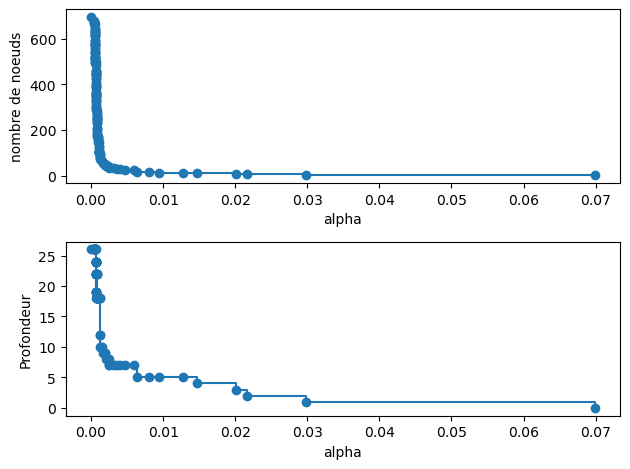

In [182]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots (2,1)

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post") 
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("nombre de noeuds")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post") 
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Profondeur")
               
fig.tight_layout()

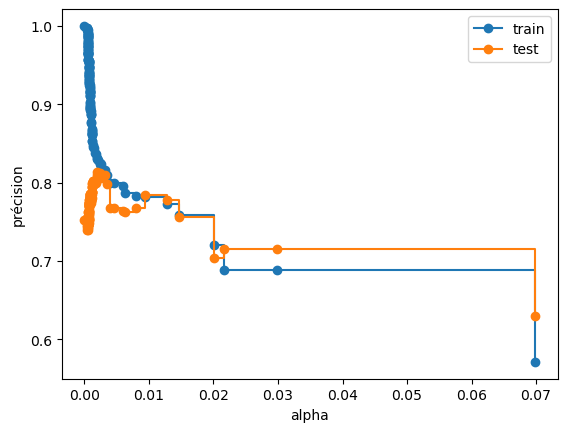

In [183]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel("alpha") 
ax.set_ylabel("précision")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

_on choisit un ccp alpha de 0.002_

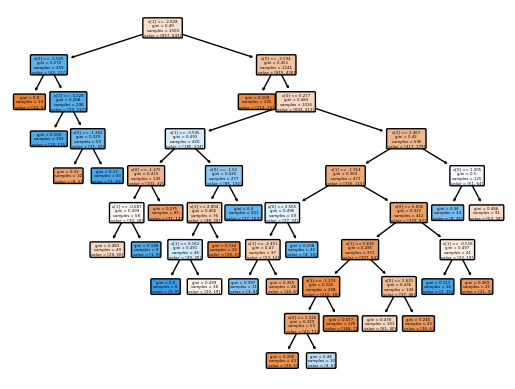

In [184]:
model= DecisionTreeClassifier(ccp_alpha=0.002)
model.fit(X_train, y_train)
tree.plot_tree(model, rounded=True, filled=True) 
plt.show()

In [185]:
y_pred = model.predict(X_test)

print("La profondeur de l'arbre est de" , model.tree_.max_depth)

accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

La profondeur de l'arbre est de 9
Précision du modèle : 0.814
Matrice de confusion :
[[274  41]
 [ 52 133]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.84      0.87      0.85       315
           2       0.76      0.72      0.74       185

    accuracy                           0.81       500
   macro avg       0.80      0.79      0.80       500
weighted avg       0.81      0.81      0.81       500



__Pre-pruning, GridSearch x CrossValidation__

In [186]:
#paramètres à tester
param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': np.arange(1, 40)}

dtree_model = DecisionTreeClassifier()

#GridSearch pour essayer toutes les combinaisons de paramètres
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
dtree_gscv.fit(X_train, y_train)

print(dtree_gscv.best_params_)

#selection du meilleur modèle
dtree_model_final = DecisionTreeClassifier(**dtree_gscv.best_params_).fit(X_train, y_train)

y_pred = dtree_model_final.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 6}
Précision du modèle : 79.00%
Rapport de classification :
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       315
           2       0.72      0.71      0.71       185

    accuracy                           0.79       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.79      0.79      0.79       500

Matrice de confusion :
[[264  51]
 [ 54 131]]


La précision est un peu moins bonne mais la profondeur de l'arbre moins grande donc cela peut être interessant pour éviter un peu plus l'over-fitting

__<span style="font-size: 18pt;">Forêt aléatoire</span>__

__Avec les données originelles__

In [187]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.806
Matrice de confusion :
[[266  49]
 [ 48 137]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.85      0.84      0.85       315
           2       0.74      0.74      0.74       185

    accuracy                           0.81       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.81      0.81      0.81       500



In [188]:
print(f"Le nombre d'arbres dans la forêt aléatoire est: {model.n_estimators}")

trees = model.estimators_
# Calcul de la profondeur moyenne des arbres
average_depth = sum(tree.tree_.max_depth for tree in trees) / len(trees)
print(f"La profondeur moyenne des arbres dans la forêt aléatoire est : {average_depth}")

Le nombre d'arbres dans la forêt aléatoire est: 100
La profondeur moyenne des arbres dans la forêt aléatoire est : 20.74


__Sans les outliers__

In [189]:
model = RandomForestClassifier(random_state=42)
model.fit(X_new_train, y_new_train)
y_new_pred = model.predict(X_new_test)

new_accuracy= accuracy_score(y_new_test, y_new_pred)
new_conf_matrix = confusion_matrix (y_new_test, y_new_pred)
new_classification_rep = classification_report (y_new_test, y_new_pred)

print(f"Précision du modèle : {new_accuracy}")
print(f"Matrice de confusion :\n{new_conf_matrix}")
print(f"Rapport de classification :\n{new_classification_rep}")

Précision du modèle : 0.7995951417004049
Matrice de confusion :
[[257  51]
 [ 48 138]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       308
           2       0.73      0.74      0.74       186

    accuracy                           0.80       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.80      0.80      0.80       494



_pas d'amélioration sans les outliers_

__Sur-apprentissage (du modèle avec les outliers) ?__

In [190]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

accuracy= accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix (y_train, y_pred)
classification_rep = classification_report (y_train, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 1.0
Matrice de confusion :
[[857   0]
 [  0 643]]
Rapport de classification :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       857
           2       1.00      1.00      1.00       643

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



*over_fitting*

__pre_pruning, GridSearch x CrossValidation__

In [191]:
# paramètres à tester
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1, 30)}

RF_model = RandomForestClassifier()

#GridSearch pour tester toutes les combinaisons de paramètres
RF_gscv = GridSearchCV(RF_model, param_grid, cv=5, n_jobs=-1)
RF_gscv.fit(X_train, y_train)

print(RF_gscv.best_params_)

#selection du meilleur modèle
RF_model_final = RandomForestClassifier(**RF_gscv.best_params_).fit(X_train, y_train)

y_pred = RF_model_final.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 9}
Précision du modèle : 82.80%
Rapport de classification :
              precision    recall  f1-score   support

           1       0.85      0.88      0.87       315
           2       0.79      0.74      0.76       185

    accuracy                           0.83       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.83      0.83      0.83       500

Matrice de confusion :
[[278  37]
 [ 49 136]]


__Over-fitting?__

In [192]:
y_pred = RF_model_final.predict(X_train)

accuracy= accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix (y_train, y_pred)
classification_rep = classification_report (y_train, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.902
Matrice de confusion :
[[801  56]
 [ 91 552]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.90      0.93      0.92       857
           2       0.91      0.86      0.88       643

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



pas d'over-fitting à priori

__<span style="font-size: 18pt;">KNN</span>__

Text(0, 0.5, 'Error Rate')

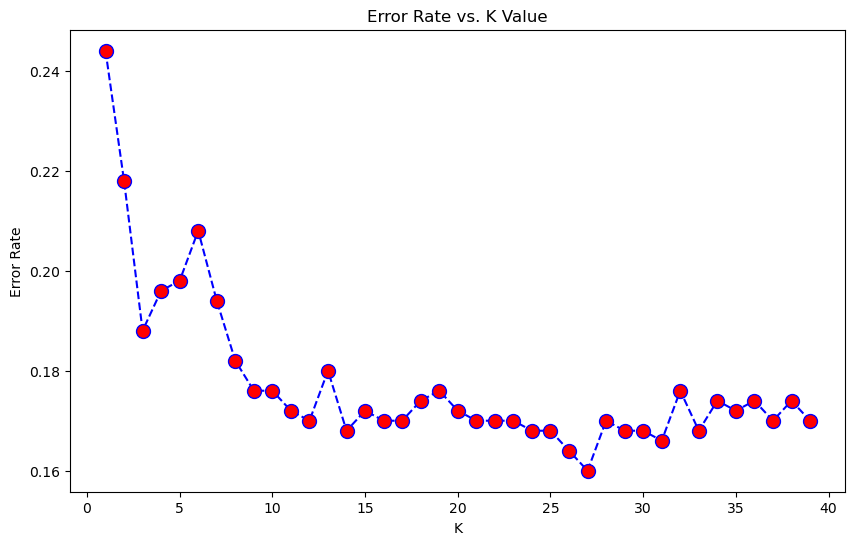

In [193]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

*on choisit k=16 (erreur stable) ou k=27 (plus faible erreur)*

In [194]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.84
Matrice de confusion :
[[277  38]
 [ 42 143]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.87      0.88      0.87       315
           2       0.79      0.77      0.78       185

    accuracy                           0.84       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.84      0.84      0.84       500



__sans les outliers :__

Text(0, 0.5, 'Error Rate')

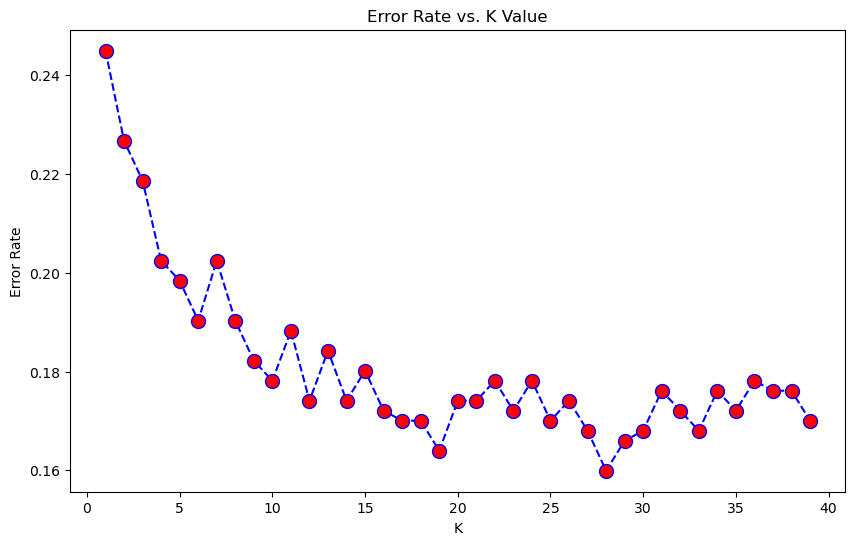

In [195]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_new_train,y_new_train)
    y_new_pred = knn.predict(X_new_test)
    error_rate.append(np.mean(y_new_pred != y_new_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [196]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_new_train, y_new_train)
y_new_pred= knn.predict(X_new_test)
 
new_accuracy= accuracy_score(y_new_test, y_new_pred)
new_conf_matrix = confusion_matrix (y_new_test, y_new_pred)
new_classification_rep = classification_report (y_new_test, y_new_pred)

print(f"Précision du modèle : {new_accuracy}")
print(f"Matrice de confusion :\n{new_conf_matrix}")
print(f"Rapport de classification :\n{new_classification_rep}")

Précision du modèle : 0.840080971659919
Matrice de confusion :
[[277  31]
 [ 48 138]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.85      0.90      0.88       308
           2       0.82      0.74      0.78       186

    accuracy                           0.84       494
   macro avg       0.83      0.82      0.83       494
weighted avg       0.84      0.84      0.84       494



_pas d'amélioration, on ne constate jamais d'amélioration significative dans la précision des modèles entrainés sur la base de données privée de ce qui auraient pu être des outliers, je ne l'utiliserai plus_

__Over-fitting (du 1er modèle KNN)?__

In [197]:
y_pred = knn.predict(X_train)

accuracy= accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix (y_train, y_pred)
classification_rep = classification_report (y_train, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.8146666666666667
Matrice de confusion :
[[766  91]
 [187 456]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.80      0.89      0.85       857
           2       0.83      0.71      0.77       643

    accuracy                           0.81      1500
   macro avg       0.82      0.80      0.81      1500
weighted avg       0.82      0.81      0.81      1500



_pas d'over-fitting à priori_

Ensuite je fais d'autres techniques même si je suis conscient que c'est pas forcément utile c'est juste pour pratiquer:

__KNN avec GridSearch__

In [198]:
params = {'n_neighbors': range(5,41), 'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), params , cv=10, scoring= 'accuracy')
grid.fit(X_train, y_train)
grid.best_params_


{'n_neighbors': 30, 'weights': 'uniform'}

In [199]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
accuracy= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix (y_test, y_pred)
classification_rep = classification_report (y_test, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")

Précision du modèle : 0.832
Matrice de confusion :
[[277  38]
 [ 46 139]]


**bagging avec KNN**

In [200]:
bagging_model = BaggingClassifier(KNeighborsClassifier(),n_estimators=100)

bagging_model.fit(X_train, y_train)
y_pred_bagg = bagging_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_bagg)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Rapport de classification :")
print(classification_report(y_test, y_pred_bagg))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_bagg))

Précision du modèle : 80.40%
Rapport de classification :
              precision    recall  f1-score   support

           1       0.85      0.84      0.84       315
           2       0.73      0.75      0.74       185

    accuracy                           0.80       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.80      0.80      0.80       500

Matrice de confusion :
[[264  51]
 [ 47 138]]


__bagging avec KNN et GridSearch__

In [201]:
param_grid = {
    'n_neighbors': range(5,30), 
    'weights': ['uniform', 'distance'], 
}

# Utiliser GridSearchCV avec le classificateur k-NN
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# meilleurs paramètres trouvés 
print("Meilleurs paramètres:", grid_search.best_params_)

#bagging avec le classificateur k-NN en utilisant les meilleurs paramètres
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
bagging_model = BaggingClassifier(best_knn_model, n_estimators=50, random_state=42)

bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

Meilleurs paramètres: {'n_neighbors': 29, 'weights': 'uniform'}


In [202]:
accuracy = accuracy_score(y_test, y_pred_bagging)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Rapport de classification :")
print(classification_report(y_test, y_pred_bagging))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred_bagging))

Précision du modèle : 83.40%
Rapport de classification :
              precision    recall  f1-score   support

           1       0.86      0.88      0.87       315
           2       0.79      0.76      0.77       185

    accuracy                           0.83       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500

Matrice de confusion :
[[277  38]
 [ 45 140]]


_pas d'amélioration_

__<span style="font-size: 18pt;">Boosting</span>__

__AdaBoost__

In [203]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Utiliser GridSearchCV
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# meilleurs paramètres trouvés par GridSearch
print("Meilleurs paramètres:", grid_search.best_params_)

best_model = AdaBoostClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Meilleurs paramètres: {'learning_rate': 0.1, 'n_estimators': 100}


In [204]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

Précision du modèle : 77.80%
Rapport de classification :
              precision    recall  f1-score   support

           1       0.77      0.92      0.84       315
           2       0.80      0.53      0.64       185

    accuracy                           0.78       500
   macro avg       0.79      0.73      0.74       500
weighted avg       0.78      0.78      0.77       500

Matrice de confusion :
[[291  24]
 [ 87  98]]


résultats peu satisfaisants

__GradientBoosting__

__Over_fitting?__

In [206]:
y_pred = best_model.predict(X_train)

accuracy= accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix (y_train, y_pred)
classification_rep = classification_report (y_train, y_pred)

print(f"Précision du modèle : {accuracy}")
print(f"Matrice de confusion :\n{conf_matrix}")
print(f"Rapport de classification :\n{classification_rep}")

Précision du modèle : 0.76
Matrice de confusion :
[[789  68]
 [292 351]]
Rapport de classification :
              precision    recall  f1-score   support

           1       0.73      0.92      0.81       857
           2       0.84      0.55      0.66       643

    accuracy                           0.76      1500
   macro avg       0.78      0.73      0.74      1500
weighted avg       0.78      0.76      0.75      1500



risque d'over-fitting

__<span style="font-size: 18pt;">Conclusion</span>__

Les modèles qui semblent les plus performants (et qui ne semblent pas surajustés) sont : arbre de classification avec post-pruning, random-forest avec pre-pruning, KNN avec 16 ou 27 voisins.

__<span style="font-size: 18pt;">Simulations de Monte Carlo pour déterminer le meilleur des modèles</span>__

In [207]:
# modèles que j'évalue
models = [DecisionTreeClassifier(ccp_alpha=0.002), RandomForestClassifier(criterion= 'gini', max_depth= 15),
          KNeighborsClassifier(n_neighbors=16), KNeighborsClassifier(n_neighbors=27)]

# le nombre d'itérations de Monte Carlo
num_iterations = 100

# tableaux pour stocker les performances de chaque modèle
accuracies = np.zeros((len(models), num_iterations))

In [208]:
# processus de Monte Carlo
for i in range(num_iterations):
    # Diviser à chaque itération les données en ensembles d'entraînement et de test différents
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Entraîner et évaluer chaque modèle
    for j, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[j, i] = accuracy_score(y_test, y_pred)

#moyenne des performances pour chaque modèle
mean_accuracies = np.mean(accuracies, axis=1)
for j, model in enumerate(models):
    print(f"Moyenne de précision pour {type(model).__name__}: {mean_accuracies[j]}")

Moyenne de précision pour DecisionTreeClassifier: 0.7931
Moyenne de précision pour RandomForestClassifier: 0.7901250000000001
Moyenne de précision pour KNeighborsClassifier: 0.809975
Moyenne de précision pour KNeighborsClassifier: 0.811325


__<span style="font-size: 30pt;">On choisit un modèle KNN considérant les 27 voisins les plus proches. </span>__

In [209]:
xsimutest_df=pd.read_csv("../donnees/xsimutest.txt", sep=' ')
print(xsimutest_df)

           X1        X2
0    1.533001  5.794728
1    5.423978 -1.849424
2   -5.107845 -1.687702
3    0.862346 -2.969889
4   -0.807342  8.193683
..        ...       ...
995 -2.910382 -3.074352
996 -4.124884 -1.101349
997  0.181706 -2.272419
998  0.300643  3.237987
999  0.319658 -1.934773

[1000 rows x 2 columns]


__<span style="font-size: 18pt;">Entrainer le modèle final sur l'ensemble des données disponible</span>__ 

In [210]:
X_train_final= simu_df.drop("Y", axis = 1)  
Y_train_final= simu_df["Y"]

model_final = KNeighborsClassifier(n_neighbors=27)
model_final.fit(X_train_final, Y_train_final)
y_pred = model_final.predict(xsimutest_df)
print(y_pred)

[2 2 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1 2
 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 1 2 1 1 1 1 1 2
 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 2 1 1 2 2
 1 2 1 1 1 1 1 2 2 1 2 2 1 2 2 2 2 2 1 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1
 2 2 1 2 2 2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2
 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 2 1 2 2 2 1 1 2 2 1 1 2 1 1 1
 2 2 2 1 2 1 2 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 1 1 1 2 2 2 2 2 2 1 1 2
 1 2 2 2 1 2 2 2 1 2 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 2 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 2 1 1 1 2 2 1 2 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1
 1 1 1 2 2 2 2 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 1
 1 2 2 2 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 2 2 1 1 2 2 

__Visualisation__

In [211]:
xsimutest_df['Y'] = y_pred

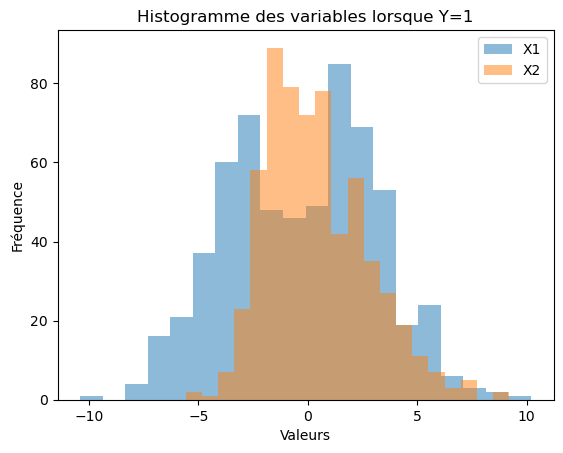

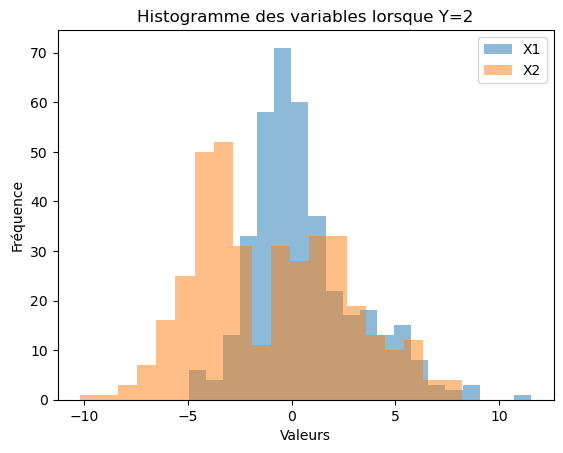

In [212]:
X= xsimutest_df[["X1" , "X2"]]

subset1 = X[xsimutest_df["Y"] == 1]

for column in subset1.columns:
    plt.hist(subset1[column], bins=20, alpha=0.5, label=column)

plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des variables lorsque Y=1')
plt.legend(loc='upper right')
plt.show()


subset2 = X[xsimutest_df["Y"] == 2]

for column in subset2.columns:
    plt.hist(subset2[column], bins=20, alpha=0.5, label=column)

plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Histogramme des variables lorsque Y=2')
plt.legend(loc='upper right')
plt.show()

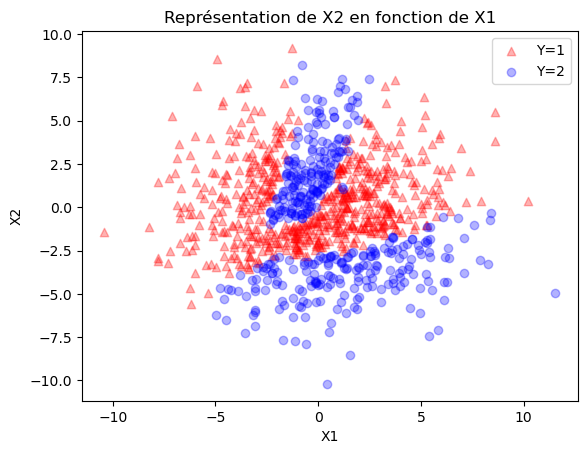

In [213]:
X1=xsimutest_df["X1"]
X2=xsimutest_df["X2"]
Y=y_pred

plt.scatter(X1[Y == 1], X2[Y == 1], marker='^', label='Y=1', color='red', alpha=0.3)
plt.scatter(X1[Y == 2], X2[Y == 2], marker='o', label='Y=2', color='blue', alpha=0.3)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Représentation de X2 en fonction de X1')
plt.legend()
plt.show()

__<span style="font-size: 30pt;">Cohérent </span>__

In [214]:
np.savetxt('predictions.txt', y_pred, delimiter='\n', fmt='%d')